# Chp 10: Timeseries

* use MAE here: Computes the mean absolute error between labels and predictions.



In [2]:
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    print('Not connected to a TPU runtime')

Tensorflow version 2.8.0
Running on TPU  ['10.93.118.10:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.93.118.10:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.93.118.10:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [3]:
def HR():
    print("-"*80)

In [4]:
def download_data():
    import os.path 
    path = './chp10/data'
    
# Check whether the specified path is an existing directory or not 
    isdir = os.path.isdir(path) 
    print(isdir) 

    if not isdir:
        print(f'{path} does not exist, creating.')
        !mkdir -p chp10/src
        !ls -la chp10
        !wget -P ./chp10/src https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
        !unzip chp10/src/jena_climate_2009_2016.csv.zip -d chp10/data
        !rm -fr chp10/data/__MACOSX
        !ls -la chp10/data
        print("Finished downloading data")
    else:
        print(f'{path} already exists')

download_data()

False
./chp10/data does not exist, creating.
total 12
drwxr-xr-x 3 root root 4096 Apr 16 10:56 .
drwxr-xr-x 1 root root 4096 Apr 16 10:56 ..
drwxr-xr-x 2 root root 4096 Apr 16 10:56 src
--2022-04-16 10:56:40--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.197.112
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.197.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘./chp10/src/jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  35.2MB/s    in 0.4s    

2022-04-16 10:56:41 (35.2 MB/s) - ‘./chp10/src/jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  chp10/src/jena_climate_2009_2016.csv.zip
  inflating: chp10/data/jena_climate_2009_2016.csv  
  inflating: chp10/data/__MACOSX/._jena_climate_2009_2016.csv  
total 42152
drwxr-xr-x 2 root root     4096 Apr 16 10:56 .
drwxr-xr-x 

In [8]:
# Listing 10.1 Inspecting the data of the Jena weather dataset

# Data Exploration

# This outputs a count of 420,551 lines of data (each line is 
# a timestep: a record of a date and 14 weather-related values), 
# as well as a header:
def listing10_1():
    import os

    fname = os.path.join("./chp10/data/jena_climate_2009_2016.csv")

    with open(fname) as f:
        data = f.read()

    lines = data.split("\n")
    header = lines[0].split(",")
    lines = lines[1:]
    print(header)
    print(len(lines))

listing10_1()

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [9]:
#%%time

# Data Exploration

def listing10_1_pandas():
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from pandas.plotting import scatter_matrix


    df = pd.read_csv("./chp10/data/jena_climate_2009_2016.csv")
    print(df.columns)
    print()
    print(df.isnull().values.any())
    print()
    print(df.info())
    print()
    print(df.head(3).T)

    #####

    #df.hist()

    #df.plot(kind='density', subplots=True,  sharex=False)

   # sns.pairplot(df, palette='YlGnBu', aspect=1.5)

    # cormat = df.corr()
    # round(cormat,2)
    # sns.heatmap(cormat)

    #plt.show()

    # scatter_matrix is too slow for big datasets!
    # scatter_matrix(df, alpha=0.2)

listing10_1_pandas()

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420451 entries, 0 to 420450
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420451 non-null  object 
 1   p (mbar)         420451 non-null  float64
 2   T (degC)         420451 non-null  float64
 3   Tpot (K)         420451 non-null  float64
 4   Tdew (degC)      420451 non-null  float64
 5   rh (%)           420451 non-null  float64
 6   VPmax (mbar)     420451 non-null  float64
 7   VPact (mbar)     420451 non-null  float64
 8   VPdef (mbar)     420451 non-null  float64
 9   sh (g/kg)        420451 non-null  float64
 10  H2OC (mmol/mol)  420451 non-null  float64
 11  rho

In [5]:
def plot(history, baseline_test_mae, baseline_vae_mae, title):
    import matplotlib.pyplot as plt

    loss = history.history["mae"]
    val_loss = history.history["val_mae"]

    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(8,6))
    plt.plot(epochs, loss, "bo", label="Training MAE")
    plt.plot(epochs, val_loss, "b", label="Validation MAE")
    plt.title(f"{title}. Training and validation MAE")

    plt.axhline(y=baseline_test_mae, label="Baseline Test Mae", c="orange", linewidth=0.8)
    plt.axhline(y=baseline_vae_mae, label="Baseline Val Mae", c="green", linewidth=0.8)

    plt.legend()
    plt.show()


---
### Dict vs Namedtuple

We could use either Dict or Namedtuple.

If you know the data will not change, we could guarantee that with Namedtuple.

https://stackoverflow.com/questions/9872255/when-and-why-should-i-use-a-namedtuple-instead-of-a-dictionary

In [10]:
# Listing 10.2 Parsing the data

# Now, convert all 420,551 lines of data into NumPy arrays: 
# one array for the temperature (in degrees Celsius), and another 
# one for the rest of the data—the features we will use to predict 
# future temperatures. Note that we discard the "Date Time" column.


# https://www.tensorflow.org/api_docs/python/tf/data/Dataset?version=nightly
# Note: If your program requires data to have a statically known shape (e.g., 
# when using XLA), you should use drop_remainder=True. 
# Without drop_remainder=True the shape of the output dataset will have an 
# unknown leading dimension due to the possibility of a smaller final batch.


def listing10_2():
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    from tensorflow import keras

    DEBUG = False

    fname = os.path.join("./chp10/data/jena_climate_2009_2016.csv")

    with open(fname) as f:
        data = f.read()

    lines = data.split("\n")
    header = lines[0].split(",")
    lines = lines[1:]

    temperature = np.zeros((len(lines),))
    raw_data = np.zeros((len(lines), len(header) - 1))

    for i, line in enumerate(lines):
        values = [float(x) for x in line.split(",")[1:]]

        # store column #1 in the "temperature" array
        temperature[i] = values[1]

        # store all columns (including the temperature) in the "raw_data" array
        raw_data[i, :] = values[:]

    # Listing 10.3 Plotting the temperature timeseries
    # See the yearly periodicity of temperature—the data spans 8 years.
    if DEBUG:
        plt.plot(range(len(temperature)), temperature)
        plt.show()


    # Listing 10.4 Plotting the first 10 days of the temperature timeseries

    # Here is a more narrow plot of the first 10 days of temperature data 
    # (see figure 10.2). Because the data is recorded every 10 minutes, 
    # you get 24 * 6 = 144 data points per day.

    if DEBUG:
        plt.plot(range(1440), temperature[:1440])
        plt.show()


    # Listing 10.5 Computing the number of samples we’ll use for each data split.
    num_train_samples = int(0.5 * len(raw_data))
    num_val_samples = int(0.25 * len(raw_data))
    num_test_samples = len(raw_data) - num_train_samples - num_val_samples

    if DEBUG:
        print("num_train_samples:", num_train_samples)
        print("num_val_samples:", num_val_samples)
        print("num_test_samples:", num_test_samples)
        print()


    # Preparing the data

    # Normalizing the data

    # Listing 10.6 Normalizing the data
    # The exact formulation of the problem will be as follows: 
    # given data covering the previous five days and sampled once per 
    # hour, can we predict the temperature in 24 hours?
    # Each timeseries in the data is on a different scale (for example, 
    # atmospheric pressure, measured in mbar, is around 1,000, while H2OC,
    # measured in millimoles per mole, is around 3). We’ll normalize each 
    # timeseries independently so that they all take small values on a 
    # similar scale. We’re going to use the first 210,225 timesteps as 
    # training data, so we’ll compute the mean and standard deviation 
    # only on this fraction of the data.
    mean = raw_data[:num_train_samples].mean(axis=0)
    raw_data -= mean
    std = raw_data[:num_train_samples].std(axis=0)
    raw_data /= std

    # Instantiating Datasets for training, validation, and testing.

    # Listing 10.7 Instantiating Datasets for training, validation, and testing.

    # Create a Dataset object that yields batches of data from the past 
    # five days along with a target temperature 24 hours in the future. 
    # Because the samples in the dataset are highly redundant (sample N 
    # and sample N + 1 will have most of their timesteps in common), 
    # it would be wasteful to explicitly allocate memory for every sample. 
    # Instead, we’ll generate the samples on the fly while only keeping in 
    # memory the original raw_data and temperature arrays, and nothing more.
    # Use built-in dataset utility, timeseries_dataset_from_array

    # Each Dataset yields a tuple (samples, targets), where samples is a batch 
    # of 256 samples, each containing 120 consecutive hours of input data, and 
    # targets is the corresponding array of 256 target temperatures. Note that 
    # the samples are randomly shuffled, so two consecutive sequences in a batch
    # (like samples[0] and samples[1]) aren’t necessarily temporally close.

    # Observations will be sampled at one data point per hour: we will only keep one data point out of 6
    sampling_rate = 6

    # Observations will go back 5 days (120 hours)
    sequence_length = 120

    # The target for a sequence will be the temperature 24 hours after the end of the sequence
    delay = sampling_rate * (sequence_length + 24 - 1)

    batch_size = 256

    print(f'raw_data type: {type(raw_data)}')
    print()

    train_dataset = keras.preprocessing.timeseries_dataset_from_array(
        raw_data[:-delay],
        targets=temperature[delay:],
        sampling_rate=sampling_rate,
        sequence_length=sequence_length,
        shuffle=True,
        batch_size=batch_size,
        start_index=0,
        end_index=num_train_samples,
        #drop_remainder=True Cannot do this in timeseries_dataset_from_array()
    )

    val_dataset = keras.preprocessing.timeseries_dataset_from_array(
        raw_data[:-delay],
        targets=temperature[delay:],
        sampling_rate=sampling_rate,
        sequence_length=sequence_length,
        shuffle=True,
        batch_size=batch_size,
        start_index=num_train_samples,
        end_index=num_train_samples + num_val_samples
    )

    test_dataset = keras.preprocessing.timeseries_dataset_from_array(
        raw_data[:-delay],
        targets=temperature[delay:],
        sampling_rate=sampling_rate,
        sequence_length=sequence_length,
        shuffle=True,
        batch_size=batch_size,
        start_index=num_train_samples + num_val_samples
    )



    # check size and shape of dataset
    print(f'train_dataset: {train_dataset}')
    print(f'val_dataset: {val_dataset}')
    print(f'test_dataset: {test_dataset}')
    print()

    # Inspecting the output of one of our Datasets.
    # Listing 10.8 Inspecting the output of one of our Datasets.

    #if DEBUG:
    for samples, targets in train_dataset:
        print("samples shape:", samples.shape)
        print("targets shape:", targets.shape)
        break
    print()


    # A common-sense, non-machine-learning baseline
    # Computing the common-sense baseline MAE
    # Listing 10.9 Computing the common-sense baseline MAE

    # The temperature timeseries can safely be assumed to be continuous 
    # (the temperatures tomorrow are likely to be close to the temperatures today)
    # as well as periodical with a daily period. Thus a common-sense approach is 
    # to always predict that the temperature 24 hours from now will be equal to 
    # the temperature right now. Evaluate this approach using the mean absolute 
    # error (MAE) metric.

    data = { 
            'train_dataset': train_dataset, 
            'val_dataset' : val_dataset, 
            'test_dataset': test_dataset, 
            'std': std, 
            'mean' : mean, 
            'raw_data': raw_data,
            'sequence_length': sequence_length, 
            'sampling_rate': sampling_rate,
    }

    return data


#######################

# Rather than global variables, use a data-object.
# First time through, create blank conn.
data = {}

def create_data(data):
    if not data:
        print("dict is empty, initializing now.")
        data = listing10_2()
        return data
    else:
        print("dict data exists")
        return data


# Test multiple calls - should show this dict already exists
data = create_data(data)
data = create_data(data)
data = create_data(data)

print(data.keys())


dict is empty, initializing now.
raw_data type: <class 'numpy.ndarray'>

train_dataset: <BatchDataset element_spec=(TensorSpec(shape=(None, None, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
val_dataset: <BatchDataset element_spec=(TensorSpec(shape=(None, None, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
test_dataset: <BatchDataset element_spec=(TensorSpec(shape=(None, None, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

samples shape: (256, 120, 14)
targets shape: (256,)

dict data exists
dict data exists
dict_keys(['train_dataset', 'val_dataset', 'test_dataset', 'std', 'mean', 'raw_data', 'sequence_length', 'sampling_rate'])


In [7]:
# Computing the common-sense, non-machine-learning baseline MAE
def listing10_9(data):
    import numpy as np

    def evaluate_naive_method(dataset):
        total_abs_err = 0.
        samples_seen = 0

        for samples, targets in dataset:
            # The temperature feature is at column 1, so samples[:, -1, 1] is the 
            # last temperature measurement in the input sequence. Recall that we 
            # normalized our features, so to retrieve a temperature in Celsius 
            # degrees, we need to un-normalize it, by multiplying it by the 
            # standard deviation and adding back the mean.
            preds = samples[:, -1, 1] * data['std'][1] + data['mean'][1]

            total_abs_err += np.sum(np.abs(preds - targets))

            samples_seen += samples.shape[0]

        return total_abs_err / samples_seen

    

    # Validation MAE: 2.44
    # Test MAE: 2.62
    # if you always assume that the temperature 24 hours in the future will be 
    # the same as it is now, you will be off by two and a half degrees on average.

    # get data
    data = create_data(data)

    # append to results dict
    results_naive['baseline_vae_mae'] = evaluate_naive_method(data['val_dataset'])
    results_naive['baseline_test_mae'] = evaluate_naive_method(data['test_dataset'])
    print(f"Validation MAE: {results_naive['baseline_vae_mae']:.2f}")
    print(f"Test MAE: {results_naive['baseline_test_mae']:.2f}")
    print()
    print(results_naive.keys())
 
    return results_naive


# Create dict to carry results
results_naive = dict()
results_naive = listing10_9(data)

print()
print(f'results_naive: {results_naive.items()}')

results = dict()
print(f'results: {results}')

dict data exists
Validation MAE: 2.44
Test MAE: 2.62

dict_keys(['baseline_vae_mae', 'baseline_test_mae'])

results_naive: dict_items([('baseline_vae_mae', 2.4417357485655167), ('baseline_test_mae', 2.6218984517612065)])
results: {}


**Training and evaluating a densely connected model**

dict data exists
Epoch 1/10
819/819 [==============================] - 21s 25ms/step - loss: 12.1053 - mae: 2.6926 - val_loss: 10.8963 - val_mae: 2.6141
Epoch 2/10
819/819 [==============================] - 13s 16ms/step - loss: 8.8094 - mae: 2.3341 - val_loss: 10.3829 - val_mae: 2.5464
Epoch 3/10
819/819 [==============================] - 13s 16ms/step - loss: 8.1337 - mae: 2.2466 - val_loss: 11.0023 - val_mae: 2.6208
Epoch 4/10
819/819 [==============================] - 13s 16ms/step - loss: 7.7391 - mae: 2.1892 - val_loss: 10.9988 - val_mae: 2.6267
Epoch 5/10
819/819 [==============================] - 13s 16ms/step - loss: 7.4187 - mae: 2.1441 - val_loss: 10.6461 - val_mae: 2.5814
Epoch 6/10
819/819 [==============================] - 13s 16ms/step - loss: 7.1961 - mae: 2.1121 - val_loss: 11.0152 - val_mae: 2.6279
Epoch 7/10
819/819 [==============================] - 13s 16ms/step - loss: 7.0364 - mae: 2.0883 - val_loss: 10.9799 - val_mae: 2.6187
Epoch 8/10
819/819 [=================

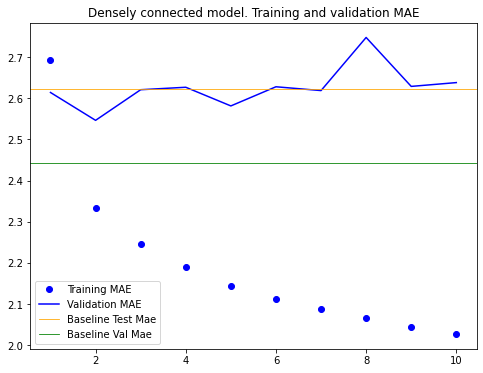

In [9]:
# Listing 10.10 Training and evaluating a densely connected model. 
# This is a very basic machine learning model

# It's useful to try simple, cheap machine-learning models (such as small, 
# densely connected networks) before looking into complicated and 
# computationally expensive models such as RNNs. This is the best way to 
# make sure any further complexity you throw at the problem is legitimate 
# and delivers real benefits.

# The following listing shows a fully connected model that starts by flattening 
# the data and then runs it through two Dense layers. Note the lack of 
# activation function on the last Dense layer, which is typical for a 
# regression problem. We use Mean Squared Error (MSE) as the loss, rather 
# than MAE, because unlike MAE, it’s smooth around zero, a useful property 
# for gradient descent. We will monitor MAE by adding it as a metric in compile().


def listing10_10(data):
    from tensorflow import keras
    from tensorflow.keras import layers
    import numpy as np

    # get data
    data = create_data(data)
    sequence_length = data['sequence_length']
    raw_data = data['raw_data']

    with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU

        inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

        x = layers.Flatten()(inputs)
        x = layers.Dense(16, activation="relu")(x)
        outputs = layers.Dense(1)(x)
        model = keras.Model(inputs, outputs)

        # Use a callback to save the best performing model
        model_file = "jena_dense.keras"
        callbacks = [
            keras.callbacks.ModelCheckpoint(
                model_file,
                save_best_only=True
            )
        ]
        model.compile(
            optimizer="rmsprop", 
            loss="mse", 
            metrics=["mae"],
            steps_per_execution=10,
        )


    history = model.fit(
        data['train_dataset'],
        epochs=10,
        validation_data=data['val_dataset'],
        callbacks=callbacks,
    )
    
    print()

    # Reload the best model and evaluate it on the test data
    model = keras.models.load_model(model_file)

    print(f"Test MAE: {model.evaluate(data['test_dataset'])[1]:.2f}")

    print()
    print(history.history.keys())
    # dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

    plot(history, results_naive['baseline_test_mae'], results_naive['baseline_vae_mae'], 'Densely connected model')

    results['jena_dense.keras'] = history.history

listing10_10(data)

# Test MAE: 2.63

dict data exists
Epoch 1/10
819/819 [==============================] - 24s 30ms/step - loss: 21.9660 - mae: 3.6604 - val_loss: 14.8162 - val_mae: 3.0355
Epoch 2/10
819/819 [==============================] - 14s 17ms/step - loss: 15.6078 - mae: 3.1272 - val_loss: 14.3722 - val_mae: 2.9843
Epoch 3/10
819/819 [==============================] - 14s 17ms/step - loss: 14.3669 - mae: 2.9993 - val_loss: 15.0985 - val_mae: 3.0847
Epoch 4/10
819/819 [==============================] - 14s 17ms/step - loss: 13.6056 - mae: 2.9167 - val_loss: 15.2053 - val_mae: 3.0583
Epoch 5/10
819/819 [==============================] - 14s 17ms/step - loss: 13.0110 - mae: 2.8505 - val_loss: 13.9810 - val_mae: 2.9512
Epoch 6/10
819/819 [==============================] - 14s 17ms/step - loss: 12.5215 - mae: 2.7980 - val_loss: 13.6753 - val_mae: 2.9049
Epoch 7/10
819/819 [==============================] - 14s 17ms/step - loss: 12.0728 - mae: 2.7497 - val_loss: 14.1605 - val_mae: 2.9533
Epoch 8/10
819/819 [===========

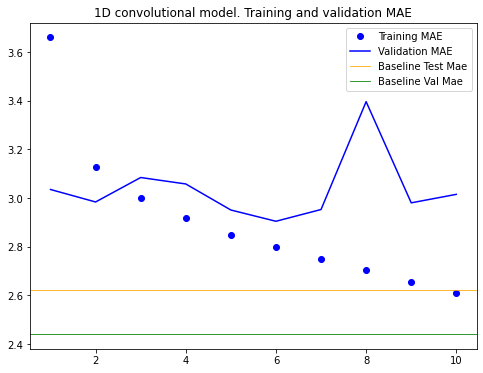

In [10]:
# 10.2.4 Trying a 1D convolutional model

# Since our input sequences feature daily cycles, a convolutional model could 
# work. A temporal convnet could reuse the same representations across 
# different days, much like a spatial convnet can reuse the same representations
# across different locations in an image.

# The Conv1D layer relies on 1D windows that slide across input sequences.

# Here we build 1D convnets, strictly analoguous to 2D convnets. They’re a 
# great fit for any sequence data that follows the translation invariance 
# assumption (meaning that if you slide a window over the sequence, the 
# content of the window should follow the same properties independently of the 
# location of the window).

# RESULTS: Two things
# 1. First, weather data doesn’t quite respect the translation invariance 
# assumption. While the data does feature daily cycles, data from a morning 
# follows different properties than data from an evening or from the middle of 
# the night. Weather data is only translation-invariant for a very specific 
# timescale.

# 2. Second, order in our data matters — a lot. The recent past is far more 
# informative to predict the next day's temperature than data from five days 
# ago. A 1D convnet is not able to leverage this fact. In particular, our max 
# pooling and global average pooling layers are largely destroying order 
# information.

def listing10_2_4(data):
    from tensorflow import keras
    from tensorflow.keras import layers
    import numpy as np

    # Get and prepare data
    data = create_data(data)
    
    sequence_length = data['sequence_length']
    raw_data = data['raw_data']

    with tpu_strategy.scope(): 
    # creating the model in the TPUStrategy scope
    # this means we train the model on the TPU

        inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

        # Pick an initial window length of 24, so that we look at 24 hours of data 
        # at a time (one cycle).
        x = layers.Conv1D(8, 24, activation="relu")(inputs)
        x = layers.MaxPooling1D(2)(x)

        # As we downsample the sequences (via MaxPooling2D layers), we’ll reduce 
        # the window size accordingly.
        x = layers.Conv1D(8, 12, activation="relu")(x)
        x = layers.MaxPooling1D(2)(x)

        x = layers.Conv1D(8, 6, activation="relu")(x)
        x = layers.GlobalAveragePooling1D()(x)

        outputs = layers.Dense(1)(x)
        model = keras.Model(inputs, outputs)

        model_file = "jena_conv.keras"
        callbacks = [
            keras.callbacks.ModelCheckpoint(
                model_file,
                save_best_only=True
            )
        ]

        model.compile(
            optimizer="rmsprop", 
            loss="mse", 
            metrics=["mae"],
            steps_per_execution=10,
        )

    history = model.fit(
        data['train_dataset'],
        epochs=10,
        validation_data=data['val_dataset'],
        callbacks=callbacks,
    )

    print('------------------------------')

    print(history.history.keys())
    print()
    model = keras.models.load_model(model_file)
    print(f"Test MAE: {model.evaluate(data['test_dataset'])[1]:.2f}")

    plot(history, results_naive['baseline_test_mae'], results_naive['baseline_vae_mae'], '1D convolutional model')

    results['jena_conv.keras'] = history.history

listing10_2_4(data)

# Test MAE: 3.22

## Simple LSTM model

dict data exists
Epoch 1/10
819/819 [==============================] - 26s 32ms/step - loss: 39.7221 - mae: 4.5967 - val_loss: 12.3389 - val_mae: 2.6740
Epoch 2/10
819/819 [==============================] - 15s 18ms/step - loss: 10.8702 - mae: 2.5683 - val_loss: 9.9780 - val_mae: 2.4613
Epoch 3/10
819/819 [==============================] - 14s 17ms/step - loss: 9.8374 - mae: 2.4506 - val_loss: 9.7721 - val_mae: 2.4379
Epoch 4/10
819/819 [==============================] - 14s 17ms/step - loss: 9.4702 - mae: 2.4024 - val_loss: 10.0113 - val_mae: 2.4609
Epoch 5/10
819/819 [==============================] - 14s 17ms/step - loss: 9.2143 - mae: 2.3653 - val_loss: 10.0015 - val_mae: 2.4648
Epoch 6/10
819/819 [==============================] - 14s 18ms/step - loss: 8.9655 - mae: 2.3314 - val_loss: 9.9570 - val_mae: 2.4650
Epoch 7/10
819/819 [==============================] - 14s 17ms/step - loss: 8.7506 - mae: 2.3040 - val_loss: 9.9054 - val_mae: 2.4528
Epoch 8/10
819/819 [====================

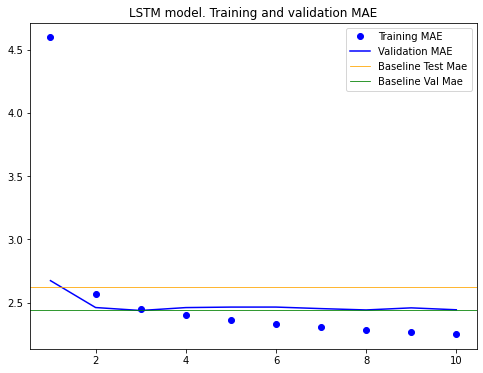

In [11]:
# Listing 10.12 A simple LSTM-based model

# The densely-connected approach first flattened the timeseries, which removed 
# the notion of time from the input data. The convolutional approach treated 
# every segment of the data in the same way, even applying pooling, which 
# destroyed order information. Let’s instead look at the data as what it is: 
# a sequence, where causality and order matter.

def listing10_12(data):
    from tensorflow import keras
    from tensorflow.keras import layers


    # Get and prepare data
    data = create_data(data)
    
    sequence_length = data['sequence_length']
    raw_data = data['raw_data']

    with tpu_strategy.scope(): 
    # creating the model in the TPUStrategy scope
    # this means we train the model on the TPU
        inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

        x = layers.LSTM(16)(inputs)
        outputs = layers.Dense(1)(x)
        model = keras.Model(inputs, outputs)

        model_file = "jena_lstm.keras"
        callbacks = [
            keras.callbacks.ModelCheckpoint(
                model_file,
                save_best_only=True
            )
        ]
        model.compile(
            optimizer="rmsprop", 
            loss="mse", 
            metrics=["mae"],
            steps_per_execution=10,
        )


    history = model.fit(
        data['train_dataset'],
        epochs=10,
        validation_data=data['val_dataset'],
        callbacks=callbacks
    )

    print('------------------------------')
    model = keras.models.load_model(model_file)
    print(f"Test MAE: {model.evaluate(data['test_dataset'])[1]:.2f}")

    plot(history, results_naive['baseline_test_mae'], results_naive['baseline_vae_mae'], 'LSTM model')
  
    results['jena_lstm.keras'] = history.history

listing10_12(data)

# Test MAE: 2.58

---

In practice, you’ll rarely work with the SimpleRNN layer. It’s generally too simplistic to be of real use. In particular, SimpleRNN has a major issue: although it should theoretically be able to retain at time t information about inputs seen many timesteps before, in practice, such long-term dependencies prove impossible to learn. This is due to the vanishing gradient problem, an effect that is similar to what is observed with non-recurrent networks (feedforward networks) that are many layers deep: as you keep adding layers to a network, the network eventually becomes untrainable.


## SimpleRNN Example 1

All recurrent layers in Keras (SimpleRNN, LSTM, and GRU) can be run in two different modes: 

1. They can return either full sequences of successive outputs for each timestep (a 3D tensor of shape (batch_size, timesteps, output_features)) 

2. They can return only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features)). 

These two modes are controlled by the `return_sequences` constructor argument.

Check here for more:
* https://machinelearningmastery.com/return-sequences-and-return-states-for-lstms-in-keras/

dict data exists
outputs: KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='lstm_1/PartitionedCall:0', description="created by layer 'lstm_1'")
Epoch 1/10
819/819 [==============================] - 25s 31ms/step - loss: 138.4979 - mae: 9.6695 - val_loss: 143.8591 - val_mae: 9.8807
Epoch 2/10
819/819 [==============================] - 14s 17ms/step - loss: 136.5076 - mae: 9.5620 - val_loss: 143.7398 - val_mae: 9.8720
Epoch 3/10
819/819 [==============================] - 14s 17ms/step - loss: 136.4146 - mae: 9.5539 - val_loss: 143.7175 - val_mae: 9.8699
Epoch 4/10
819/819 [==============================] - 14s 17ms/step - loss: 136.3793 - mae: 9.5496 - val_loss: 143.6931 - val_mae: 9.8662
Epoch 5/10
819/819 [==============================] - 14s 18ms/step - loss: 136.3239 - mae: 9.5450 - val_loss: 143.7091 - val_mae: 9.8721
Epoch 6/10
819/819 [==============================] - 14s 17ms/step - loss: 136.3062 - mae: 9.5438 - val_loss: 143.6691 - val_mae

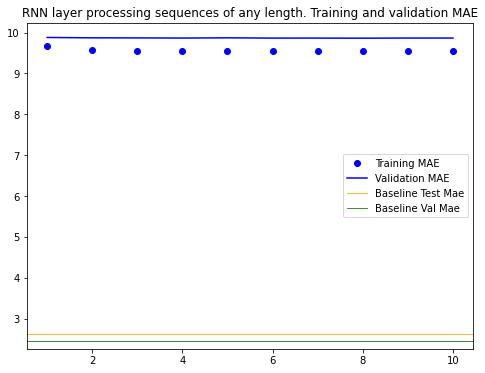

In [12]:
# Listing 10.16 A RNN layer that can process sequences of any length
def listing10_16(data):
    from tensorflow import keras
    from tensorflow.keras import layers

    # get data
    data = create_data(data)
    
    sequence_length = data['sequence_length']
    raw_data = data['raw_data']

    #inputs = keras.Input(shape=(steps, num_features))



    # SimpleRNN BREAKS WITH TPU
    with tpu_strategy.scope(): 
        # creating the model in the TPUStrategy scope
        # this means we train the model on the TPU

        inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

        #outputs = layers.SimpleRNN(16)(inputs)
        # Try LSTM instead
        outputs = layers.LSTM(16)(inputs)
        # Test MAE: 9.93


        # x = layers.LSTM(16)(inputs)
        # outputs = layers.Dense(1)(x)
        # Test MAE: 2.57


        print(f'outputs: {outputs}')
        model = keras.Model(inputs, outputs)

        model_file = "rnn_to_lstm_arbitrary_length.keras"
        callbacks = [
            keras.callbacks.ModelCheckpoint(
                model_file,
                save_best_only=True
            )
        ]
        model.compile(
            optimizer="rmsprop", 
            loss="mse", 
            metrics=["mae"],
            steps_per_execution=10,
        )


    history = model.fit(
        data['train_dataset'],
        epochs=10,
        validation_data=data['val_dataset'],
        callbacks=callbacks
    )

    print('------------------------------')
    model = keras.models.load_model(model_file)
    print(f"Test MAE: {model.evaluate(data['test_dataset'])[1]:.2f}")

    plot(history, results_naive['baseline_test_mae'], results_naive['baseline_vae_mae'], 'RNN layer processing sequences of any length')

    results[model_file] = history.history


listing10_16(data)

# SimpleRNN Test MAE: 9.93

## SimpleRNN Example 2

dict data exists
outputs: KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='lstm_2/PartitionedCall:0', description="created by layer 'lstm_2'")
Epoch 1/10
819/819 [==============================] - 24s 29ms/step - loss: 138.1191 - mae: 9.6508 - val_loss: 143.8679 - val_mae: 9.8815
Epoch 2/10
819/819 [==============================] - 14s 17ms/step - loss: 136.5268 - mae: 9.5634 - val_loss: 143.7974 - val_mae: 9.8793
Epoch 3/10
819/819 [==============================] - 14s 17ms/step - loss: 136.3309 - mae: 9.5471 - val_loss: 143.7171 - val_mae: 9.8701
Epoch 4/10
819/819 [==============================] - 13s 16ms/step - loss: 136.2536 - mae: 9.5397 - val_loss: 143.6537 - val_mae: 9.8648
Epoch 5/10
819/819 [==============================] - 14s 17ms/step - loss: 136.2321 - mae: 9.5373 - val_loss: 143.6678 - val_mae: 9.8664
Epoch 6/10
819/819 [==============================] - 14s 17ms/step - loss: 136.2291 - mae: 9.5371 - val_loss: 143.6540 - val_mae

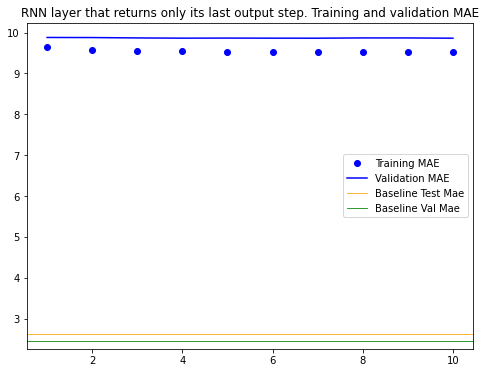

In [13]:
"""
1. Using SimpleRNN with TPU as here,
    outputs = layers.SimpleRNN(16, return_sequences=False)(inputs)
creates this error:

(0) Internal: {{function_node __inference_train_function_208106}} RET_CHECK failure (third_party/tensorflow/compiler/xla/service/dynamic_dimension_inference.cc:1597) operand != nullptr 
	 [[{{node TPUReplicate/_compile/_18213887495136088311/_4}}]]
	 [[TPUVariableReshard/last_iteration/_4422442012319361157/_7/_84]]

2. Still using SimpleRNN with TPU, but without using callbacks, we get this error:
WARNING:tensorflow:5 out of the last 824 calls to <function Model.make_train_function.<locals>.train_function at 0x7fc0b96a3320> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.

3. However, simply replacing SimpleRNN with LSTM as here,
    outputs = layers.LSTM(16, return_sequences=False)(inputs)
results in a successful compilation.
"""

# Listing 10.17 A RNN layer that returns only its last output step
def listing10_17(data):
    from tensorflow import keras
    from tensorflow.keras import layers

    # get data
    data = create_data(data)
    
    sequence_length = data['sequence_length']
    raw_data = data['raw_data']

    with tpu_strategy.scope(): 
        # creating the model in the TPUStrategy scope
        # this means we train the model on the TPU

        inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

        #outputs = layers.SimpleRNN(16, return_sequences=False)(inputs)
        outputs = layers.LSTM(16, return_sequences=False)(inputs)

        print(f'outputs: {outputs}')
        model = keras.Model(inputs, outputs)

        model_file = "rnn_to_lstm_return_only_last_output_step.keras"
        callbacks = [
            keras.callbacks.ModelCheckpoint(
                model_file,
                save_best_only=True
            )
        ]
        model.compile(
            optimizer="rmsprop", 
            loss="mse", 
            metrics=["mae"],
            steps_per_execution=10, # default is steps_per_execution=None
        )


    history = model.fit(
        data['train_dataset'],
        epochs=10,
        validation_data=data['val_dataset'],
        callbacks=callbacks
    )

    print('------------------------------')
    model = keras.models.load_model(model_file)
    print(f"Test MAE: {model.evaluate(data['test_dataset'])[1]:.2f}")

    plot(history, results_naive['baseline_test_mae'], results_naive['baseline_vae_mae'], 'RNN layer that returns only its last output step')

    results[model_file] = history.history

listing10_17(data)

# SimpleRNN Test MAE: 9.92

# LSTM Test MAE: 9.93

## SimpleRNN Example 3

In [14]:
# Listing 10.18 A RNN layer that returns its full output sequence

# A RNN layer can also return the entire sequence of outputs for each 
# sample (one vector per timestep per sample), if you set 
# return_sequences=True. The shape of this output is 
# https://www.tensorflow.org/guide/keras/rnn



# NOT WORKING
# InvalidArgumentError:  required broadcastable shapes at loc(unknown)


def listing10_18(data):
    from tensorflow import keras
    from tensorflow.keras import layers

    # get data
    data = create_data(data)
    
    sequence_length = data['sequence_length']
    raw_data = data['raw_data']

    print(f'sequence_length, raw_data.shape[-1]: ({sequence_length}, {raw_data.shape[-1]})')
    print()

    with tpu_strategy.scope(): 
    # creating the model in the TPUStrategy scope
    # this means we train the model on the TPU
        #inputs = keras.Input(shape=(steps, num_features))
        inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
        


        # GB Using return_sequences=True changes the shape of the data, 
        # hence this results in an error as-is


        outputs = layers.LSTM(16, return_sequences=True)(inputs)
        # outputs = layers.SimpleRNN(16, return_sequences=True)(inputs)

        print(f'outputs.shape: {outputs.shape}')
        print(f'outputs: {outputs}')
        print()

        model = keras.Model(inputs, outputs)

        model_file = "rnn_to_lstm_return_full_output.keras"
        callbacks = [
            keras.callbacks.ModelCheckpoint(
                model_file,
                save_best_only=True
            )
        ]
        model.compile(
            optimizer="rmsprop", 
            loss="mse", 
            metrics=["mae"],
            steps_per_execution=10,
        )


    history = model.fit(
        data['train_dataset'],
        epochs=10,
        validation_data=data['val_dataset'],
        callbacks=callbacks
    )

    print('------------------------------')
    model = keras.models.load_model(model_file)
    print(f"Test MAE: {model.evaluate(data['test_dataset'])[1]:.2f}")

    plot(history, results_naive['baseline_test_mae'], results_naive['baseline_vae_mae'], 'RNN layer that returns only its last output step')

    results[model_file] = history.history

#listing10_18(data)

## SimpleRNN Example 4

dict data exists
outputs: KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='lstm_5/PartitionedCall:0', description="created by layer 'lstm_5'")
Epoch 1/10
819/819 [==============================] - 52s 64ms/step - loss: 137.3047 - mae: 9.5988 - val_loss: 143.6111 - val_mae: 9.8610
Epoch 2/10
819/819 [==============================] - 32s 39ms/step - loss: 135.9551 - mae: 9.5150 - val_loss: 143.5656 - val_mae: 9.8554
Epoch 3/10
819/819 [==============================] - 32s 39ms/step - loss: 135.8773 - mae: 9.5023 - val_loss: 143.5500 - val_mae: 9.8542
Epoch 4/10
819/819 [==============================] - 32s 39ms/step - loss: 135.8351 - mae: 9.4947 - val_loss: 143.5589 - val_mae: 9.8548
Epoch 5/10
819/819 [==============================] - 32s 40ms/step - loss: 135.7886 - mae: 9.4868 - val_loss: 143.6074 - val_mae: 9.8599
Epoch 6/10
819/819 [==============================] - 32s 39ms/step - loss: 135.7836 - mae: 9.4855 - val_loss: 143.6062 - val_mae

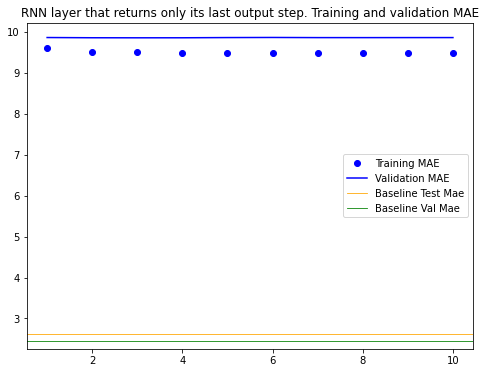

In [15]:
# Listing 10.19 Stacking RNN layers
# It’s sometimes useful to stack several recurrent layers one after the other 
# in order to increase the representational power of a network. In such a 
# setup, you have to get all of the intermediate layers to return full 
# sequence of outputs.


"""
1. Using SimpleRNN with TPU as here,
    outputs = layers.SimpleRNN(16, return_sequences=False)(inputs)
creates this error:

InternalError: 9 root error(s) found.
  (0) Internal: {{function_node __inference_train_function_299048}} RET_CHECK failure (third_party/tensorflow/compiler/xla/service/dynamic_dimension_inference.cc:1597) operand != nullptr 
	 [[{{node TPUReplicate/_compile/_10349421270108926050/_4}}]]
	 [[while/body/_1/while/strided_slice_23/_403]]
"""


def listing10_19(data):
    from tensorflow import keras
    from tensorflow.keras import layers

    # get data
    data = create_data(data)
    
    sequence_length = data['sequence_length']
    raw_data = data['raw_data']

    with tpu_strategy.scope(): 
        # creating the model in the TPUStrategy scope
        # this means we train the model on the TPU

        #inputs = keras.Input(shape=(steps, num_features))
        inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
        # x = layers.SimpleRNN(16, return_sequences=True)(inputs)
        # x = layers.SimpleRNN(16, return_sequences=True)(x)
        # outputs = layers.SimpleRNN(16)(x)

        x = layers.LSTM(16, return_sequences=True)(inputs)
        x = layers.LSTM(16, return_sequences=True)(x)
        outputs = layers.LSTM(16)(x)

        print(f'outputs: {outputs}')
        model = keras.Model(inputs, outputs)

        model_file = "stacking_rnn_to_lstm_layers.keras"
        callbacks = [
            keras.callbacks.ModelCheckpoint(
                model_file,
                save_best_only=True
            )
        ]

        model.compile(
            optimizer="rmsprop", 
            loss="mse", 
            metrics=["mae"],
            steps_per_execution=10,
        )


    history = model.fit(
        data['train_dataset'],
        epochs=10,
        validation_data=data['val_dataset'],
        callbacks=callbacks
    )

    print('------------------------------')
    model = keras.models.load_model(model_file)
    print(f"Test MAE: {model.evaluate(data['test_dataset'])[1]:.2f}")

    plot(history, results_naive['baseline_test_mae'], results_naive['baseline_vae_mae'], 'RNN layer that returns only its last output step')

    results[model_file] = history.history

listing10_19(data)

# LSTM Test MAE: 9.91

**Training and evaluating a dropout-regularized LSTM**

dict data exists
Epoch 1/10
819/819 [==============================] - 223s 272ms/step - loss: 28.1424 - mae: 3.9122 - val_loss: 9.6253 - val_mae: 2.4120
Epoch 2/10
819/819 [==============================] - 14s 17ms/step - loss: 15.0197 - mae: 3.0119 - val_loss: 9.0221 - val_mae: 2.3395
Epoch 3/10
819/819 [==============================] - 14s 17ms/step - loss: 14.2753 - mae: 2.9306 - val_loss: 9.0633 - val_mae: 2.3491
Epoch 4/10
819/819 [==============================] - 14s 17ms/step - loss: 13.7708 - mae: 2.8756 - val_loss: 9.0317 - val_mae: 2.3311
Epoch 5/10
819/819 [==============================] - 14s 17ms/step - loss: 13.4072 - mae: 2.8368 - val_loss: 9.1973 - val_mae: 2.3463
Epoch 6/10
819/819 [==============================] - 14s 17ms/step - loss: 13.0773 - mae: 2.8027 - val_loss: 9.2439 - val_mae: 2.3517
Epoch 7/10
819/819 [==============================] - 14s 17ms/step - loss: 12.8538 - mae: 2.7772 - val_loss: 9.2798 - val_mae: 2.3503
Epoch 8/10
819/819 [================

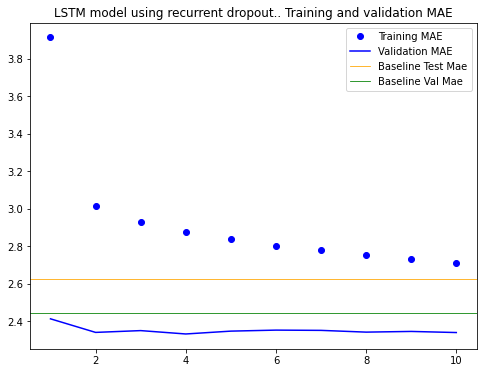

In [16]:
# Training and evaluating a dropout-regularized LSTM
# GB: Reference:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU?version=nightly#used-in-the-notebooks_1
# The requirements to use the cuDNN implementation are:
# activation == tanh
# recurrent_activation == sigmoid
# recurrent_dropout == 0
# unroll is False
# use_bias is True
# reset_after is True
# Inputs, if use masking, are strictly right-padded.
# Eager execution is enabled in the outermost context.

# GB: Test using unroll=True
# Listing 10.22 Training and evaluating a dropout-regularized LSTM
# Used non-standard setting (`recurrent_dropout=0.5`), runs very slowly!

def listing10_22(data):
    from tensorflow import keras
    from tensorflow.keras import layers


    # Get and prepare data
    data = create_data(data)
    
    sequence_length = data['sequence_length']
    raw_data = data['raw_data']

    with tpu_strategy.scope(): 
    # creating the model in the TPUStrategy scope
    # this means we train the model on the TPU

        inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

        # OLD
        # x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)

        # NEW
        # Because we use a non-standard setting, we get this warning, and it 
        # runs very very slowly!
        # WARNING:tensorflow:Layer lstm will not use cuDNN kernels since it 
        # doesn't meet the criteria. It will use a generic GPU kernel as 
        # fallback when running on GPU.

        x = layers.LSTM(32, recurrent_dropout=0.2, unroll=True)(inputs)
        x = layers.Dropout(0.5)(x)
        outputs = layers.Dense(1)(x)
        model = keras.Model(inputs, outputs)

        model_file = "jena_lstm_dropout.keras"
        callbacks = [
            keras.callbacks.ModelCheckpoint(
                model_file,
                save_best_only=True
            )
        ]
        
        model.compile(
            optimizer="rmsprop", 
            loss="mse", 
            metrics=["mae"],
            steps_per_execution=10,
        )


    history = model.fit(
        data['train_dataset'],
        epochs=10,
        validation_data=data['val_dataset'],
        callbacks=callbacks
    )

    print('------------------------------')
    model = keras.models.load_model(model_file)
    print(f"Test MAE: {model.evaluate(data['test_dataset'])[1]:.2f}")

    plot(history, results_naive['baseline_test_mae'], results_naive['baseline_vae_mae'], 'LSTM model using recurrent dropout.')

    results['jena_lstm_dropout.keras'] = history.history

listing10_22(data)

# Test MAE: 2.47

In [17]:
def m11_1():
    print("test")
    
m11_1 

<function __main__.m11_1>

**Training and evaluating a dropout-regularized, stacked GRU model**

dict data exists
Epoch 1/10
819/819 [==============================] - 253s 309ms/step - loss: 82.3408 - mae: 7.3358 - val_loss: 66.1386 - val_mae: 6.6926
Epoch 2/10
819/819 [==============================] - 13s 16ms/step - loss: 78.3031 - mae: 7.1639 - val_loss: 66.0815 - val_mae: 6.6902
Epoch 3/10
819/819 [==============================] - 14s 17ms/step - loss: 78.1057 - mae: 7.1556 - val_loss: 66.1050 - val_mae: 6.6912
Epoch 4/10
819/819 [==============================] - 14s 17ms/step - loss: 77.9494 - mae: 7.1488 - val_loss: 65.7095 - val_mae: 6.6722
Epoch 5/10
819/819 [==============================] - 14s 17ms/step - loss: 77.8143 - mae: 7.1429 - val_loss: 66.0148 - val_mae: 6.6869
Epoch 6/10
819/819 [==============================] - 13s 16ms/step - loss: 77.6859 - mae: 7.1375 - val_loss: 65.7953 - val_mae: 6.6762
Epoch 7/10
819/819 [==============================] - 15s 19ms/step - loss: 77.5662 - mae: 7.1322 - val_loss: 65.9368 - val_mae: 6.6831
Epoch 8/10
819/819 [=========

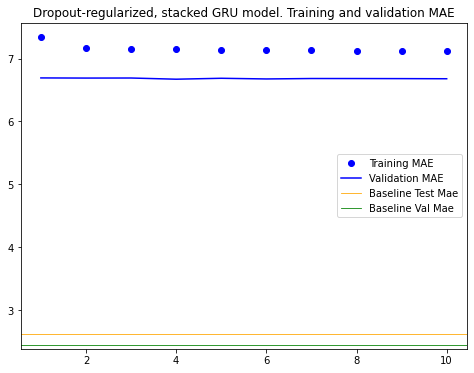

In [18]:
# Listing 10.23 Training and evaluating a dropout-regularized, stacked GRU model
# Used non-standard setting (`recurrent_dropout=0.5`), runs very slowly!
def listing10_23(data):
    from tensorflow import keras
    from tensorflow.keras import layers

    # Get and prepare data
    data = create_data(data)


    # when using unroll=True, sequence_length cannot be None
    sequence_length = data['sequence_length']
    raw_data = data['raw_data']


    with tpu_strategy.scope(): 
    # creating the model in the TPUStrategy scope
    # this means we train the model on the TPU

        inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

        x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True, unroll=True)(inputs)
        x = layers.Dropout(0.5)(x)

        outputs = layers.Dense(1)(x)
        model = keras.Model(inputs, outputs)

        model_file = "jena_stacked_gru_dropout.keras"
        callbacks = [
            keras.callbacks.ModelCheckpoint(
                model_file,
                save_best_only=True
            )
        ]

        model.compile(
            optimizer="rmsprop", 
            loss="mse", 
            metrics=["mae"],
            steps_per_execution=10,
        )


    history = model.fit(
        data['train_dataset'],
        epochs=10,
        validation_data=data['val_dataset'],
        callbacks=callbacks
    )

    print('------------------------------')
    model = keras.models.load_model(model_file)
    print(f"Test MAE: {model.evaluate(data['test_dataset'])[1]:.2f}")

    plot(history, results_naive['baseline_test_mae'], results_naive['baseline_vae_mae'], 'Dropout-regularized, stacked GRU model')

    results['jena_stacked_gru_dropout.keras'] = history.history

listing10_23(data)

# Test MAE: 3.81


### Using bidirectional RNNs

**Training and evaluating a bidirectional LSTM**

In [19]:
# Training and evaluating a bidirectional LSTM.
# This doesn’t perform as well as the plain LSTM layer.
# All the predictive capacity must come from the chronological half of the 
# network, because the antichronological half is known to be severely 
# underperforming on this task (again, because the recent past matters much 
# more than the distant past in this case). At the same time, the presence of 
# the antichronological half doubles the network’s capacity and causes it to 
# start overfitting much earlier.
# However, bidirectional RNNs are a great fit for text data—or any other kind 
# of data where order matters, yet where which order you use doesn’t matter.

"""
Using TPU, get this error:

UnimplementedError: 9 root error(s) found.
  (0) Unimplemented: {{function_node __inference_train_function_714111}} Dynamic dimension propagation on reversed dimension is not supported %reverse.128 = f32[<=120,<=32,14]{2,0,1} reverse(f32[<=120,<=32,14]{2,0,1} %transpose.127), dimensions={0}, metadata={op_type="ReverseV2" op_name="model_19/bidirectional/backward_lstm_4/PartitionedCall/ReverseV2"}
	 [[{{node TPUReplicate/_compile/_15713800203312439159/_4}}]]
	 [[tpu_compile_succeeded_assert/_17412698179675911818/_5/_245]]


    It is found that the first dimension batch_size of the data_set is 
    dynamically changed by None. It stands to reason that the batch_size is 
    specified, and the batch_size of the data_set should be fixed, so I 
    turned the official tensorflow document and found that 
    tf.data.Dataset.batch() has a drop_remainder option. Decide whether to 
    discard the part of the sequence whose tail length is less than batch_size,

    So try to change data_set.batch(batch_size) to 
    data_set.batch(batch_size, drop_remainder=True),  
"""


def listing10_24(data):
    from tensorflow import keras
    from tensorflow.keras import layers

    # Get and prepare data
    data = create_data(data)

    print(data.keys())
    print("ORIGINAL:", data['train_dataset'])
    print(type(data['train_dataset']))
    print()

    data['train_dataset'] = data['train_dataset'].batch(32, drop_remainder=True)
    print("NEW:", data['train_dataset'])
    
    
    # when using unroll=True, sequence_length cannot be None
    sequence_length = data['sequence_length']
    raw_data = data['raw_data']


    # with tpu_strategy.scope(): 
    # creating the model in the TPUStrategy scope
    # this means we train the model on the TPU

    # OK:
    # <class 'keras.engine.keras_tensor.KerasTensor'>
    # KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float16, name=None), name='bidirectional_3/concat:0', description="created by layer 'bidirectional_3'")

    # NOT WORKING:
    # <class 'keras.engine.keras_tensor.KerasTensor'>
    # KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='bidirectional_11/concat:0', description="created by layer 'bidirectional_11'")


    inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
    x = layers.Bidirectional(layers.LSTM(16))(inputs)
    HR()
    print(type(x))
    print(f"x: {x}")
    HR()

    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs, outputs)

    model_file = "bidirectional_lstm.keras" 
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            model_file,
            save_best_only=False
        )
    ]
    model.compile(
        optimizer="rmsprop", 
        loss="mse", 
        metrics=["mae"]
    )

    history = model.fit(
        data['train_dataset'],
        epochs=10,
        validation_data=data['val_dataset'],
        callbacks=callbacks,
    )

    # Listing 10.11 Plotting results
    # Display the loss curves for validation and training
    print()
    print(history.history.keys())
    print()

    print('------------------------------')
    model = keras.models.load_model(model_file)
    print(f"Test MAE: {model.evaluate(data['test_dataset'])[1]:.2f}")   
    
    plot(history, results['baseline_test_mae'], results['baseline_vae_mae'], 'Dropout-regularized, stacked GRU model')

    results['bidirectional_lstm.keras'] = history.history

# listing10_24(data)


'jena_dense.keras'
'jena_conv.keras'
'jena_lstm.keras'
'rnn_to_lstm_arbitrary_length.keras'
'rnn_to_lstm_return_only_last_output_step.keras'
'stacking_rnn_to_lstm_layers.keras'
'jena_lstm_dropout.keras'
'jena_stacked_gru_dropout.keras'



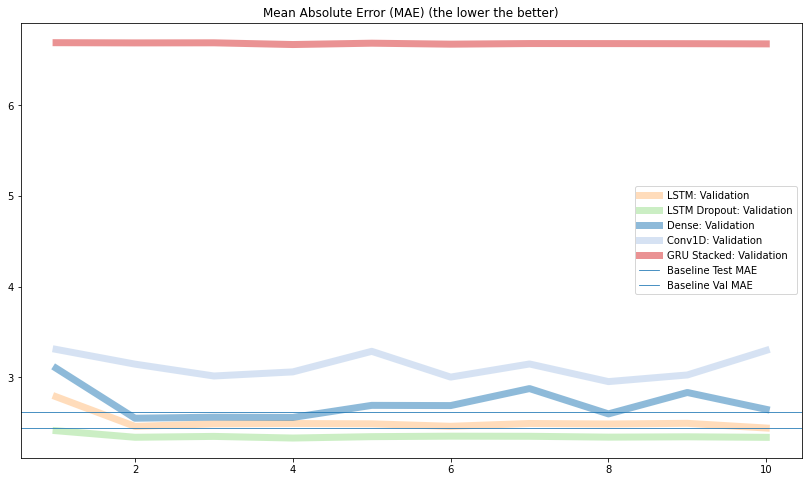

In [20]:
# loss, val_loss, mae, val_mae

# 'jena_dense.keras'
# 'jena_conv.keras'
# 'jena_lstm.keras'
# 'rnn_arbitrary_length.keras'
# 'rnn_return_only_last_output_step.keras'
# 'jena_lstm_dropout.keras'
# 'jena_stacked_gru_dropout.keras'

#plt.plot(epochs, results['rnn_arbitrary_length.keras']['loss'], "o", color=cmap(3), label="RNN: Training")
#plt.plot(epochs, results['rnn_arbitrary_length.keras']['val_loss'], color=cmap(3), label="RNN: Validation")

#plt.plot(epochs, results['rnn_return_only_last_output_step.keras']['loss'], "o", color=cmap(4), label="RNN Return: Training")
#plt.plot(epochs, results['rnn_return_only_last_output_step.keras']['val_loss'], color=cmap(4), label="RNN Return: Validation")

def plot_all():
    import matplotlib.pyplot as plt
    import pprint; pp = pprint.PrettyPrinter(indent=4)
    
    for k in results:
        pp.pprint(k)
    print()

    epochs = range(1, len(results['jena_dense.keras']['loss']) + 1)

    plt.figure(figsize=(14,8))
    
    cmap = plt.get_cmap("tab20")
    #cmap = plt.get_cmap("tab10")

    lw = 7
    ap = 0.5

    #plt.plot(epochs, results['jena_lstm.keras']['mae'], "-o", linewidth=lw, color=cmap(3), alpha=ap, )
    plt.plot(epochs, results['jena_lstm.keras']['val_mae'], linewidth=lw, color=cmap(3), alpha=ap, label="LSTM: Validation")

    #plt.plot(epochs, results['jena_lstm_dropout.keras']['mae'], "-o", linewidth=lw, color=cmap(5), alpha=ap, )
    plt.plot(epochs, results['jena_lstm_dropout.keras']['val_mae'], linewidth=lw, color=cmap(5), alpha=ap, label="LSTM Dropout: Validation")


    #plt.plot(epochs, results['jena_dense.keras']['mae'], "-o",  linewidth=lw, color=cmap(0), alpha=ap, )
    plt.plot(epochs, results['jena_dense.keras']['val_mae'], linewidth=lw, color=cmap(0), alpha=ap, label="Dense: Validation")
    
    #plt.plot(epochs, results['jena_conv.keras']['mae'], "-o", linewidth=lw, color=cmap(1), alpha=ap, )
    plt.plot(epochs, results['jena_conv.keras']['val_mae'], linewidth=lw, color=cmap(1), alpha=ap, label="Conv1D: Validation")


    #plt.plot(epochs, results['jena_stacked_gru_dropout.keras']['mae'], "-o", linewidth=lw, color=cmap(6), alpha=ap, )
    plt.plot(epochs, results['jena_stacked_gru_dropout.keras']['val_mae'], linewidth=lw, color=cmap(6), alpha=ap, label="GRU Stacked: Validation")


    plt.axhline(y=results_naive['baseline_test_mae'], label="Baseline Test MAE",  linewidth=0.8)
    plt.axhline(y=results_naive['baseline_vae_mae'],  label="Baseline Val MAE",  linewidth=0.8)
    plt.title("Mean Absolute Error (MAE) (the lower the better)")
    plt.legend()
    plt.show()

plot_all()